In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Path to the CSV file on your Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/hasilsmote.csv'

# Read the CSV file, skipping lines causing errors
databanjir = pd.read_csv(file_path, error_bad_lines=False)

# Display the data
print(databanjir)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
    TinggiLaut  KecepatanAngin  GangguanCuaca  Gelombang  Astronomi  rob
0     1.000000               0              1   1.250000          0    0
1     1.100000               0              1   1.250000          0    0
2     1.200000               0              1   1.000000          1    0
3     1.300000              15              1   1.000000          1    0
4     1.400000              10              1   0.750000          1    0
5     1.400000              15              1   0.750000          1    0
6     1.500000              15              1   0.750000          1    1
7     1.500000              25              1   1.500000          1    1
8     1.500000              15              1   2.000000          1    1
9     1.500000              15              1   2.000000          1    1
10    1.400000               8              1   2.000000          1 

<ipython-input-7-8113fd8145aa>:11: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  databanjir = pd.read_csv(file_path, error_bad_lines=False)


In [ ]:
databanjir.head()

,TinggiLaut,KecepatanAngin,GangguanCuaca,Gelombang,Astronomi,rob
0,1.0,0,1,1.25,0,0
1,1.1,0,1,1.25,0,0
2,1.2,0,1,1.00,1,0
3,1.3,15,1,1.00,1,0
4,1.4,10,1,0.75,1,0


In [ ]:
databanjir.shape

(42, 6)

In [ ]:
databanjir.columns

Index(['TinggiLaut', 'KecepatanAngin', 'GangguanCuaca', 'Gelombang',
       'Astronomi', 'rob'],
      dtype='object')

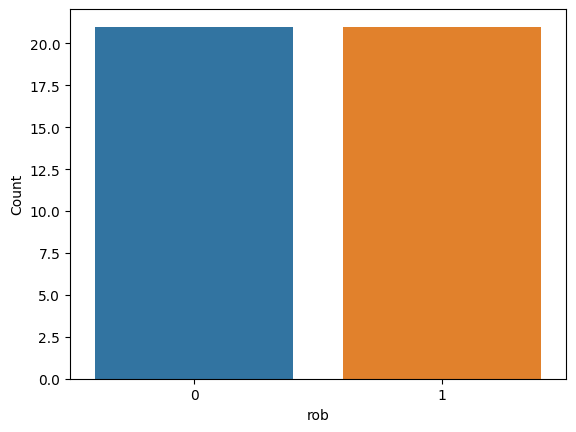

0    21
1    21
Name: rob, dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot
sns.countplot(data=databanjir, x='rob')

# Set the y-axis label
plt.ylabel('Count')

# Display the plot
plt.show()

# Display the value counts
print(databanjir['rob'].value_counts())


In [ ]:
databanjir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TinggiLaut      42 non-null     float64
 1   KecepatanAngin  42 non-null     int64  
 2   GangguanCuaca   42 non-null     int64  
 3   Gelombang       42 non-null     float64
 4   Astronomi       42 non-null     int64  
 5   rob             42 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 2.1 KB


<function matplotlib.pyplot.show(close=None, block=None)>

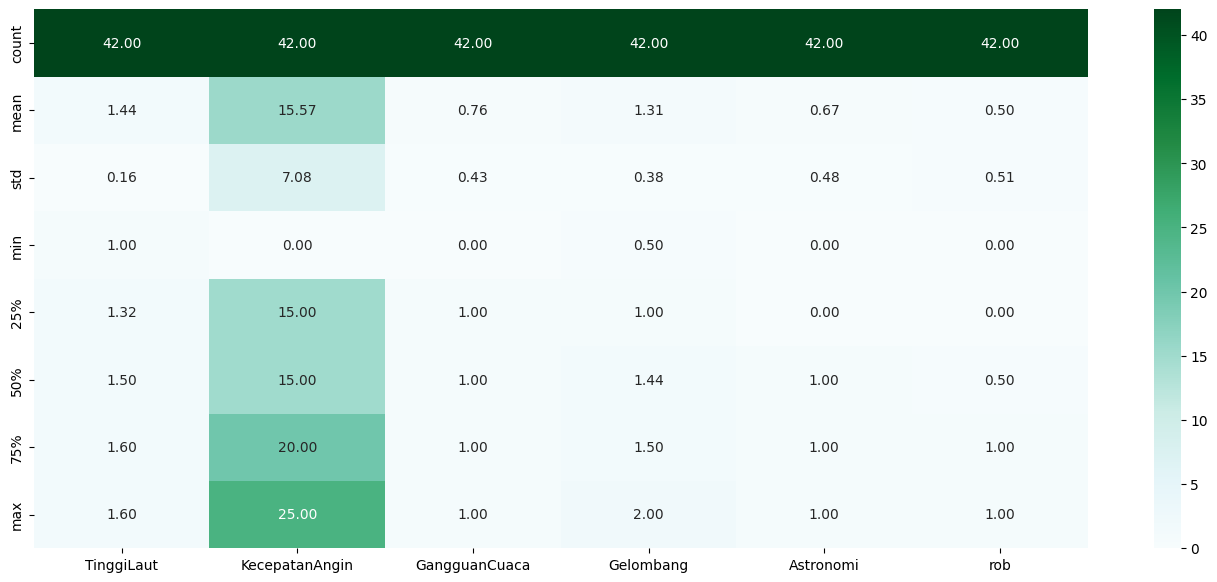

In [ ]:
fig, ax = plt.subplots(figsize=(17,7))
sns.heatmap(databanjir.describe(),annot=True,fmt=".2f",cmap='BuGn')
plt.show

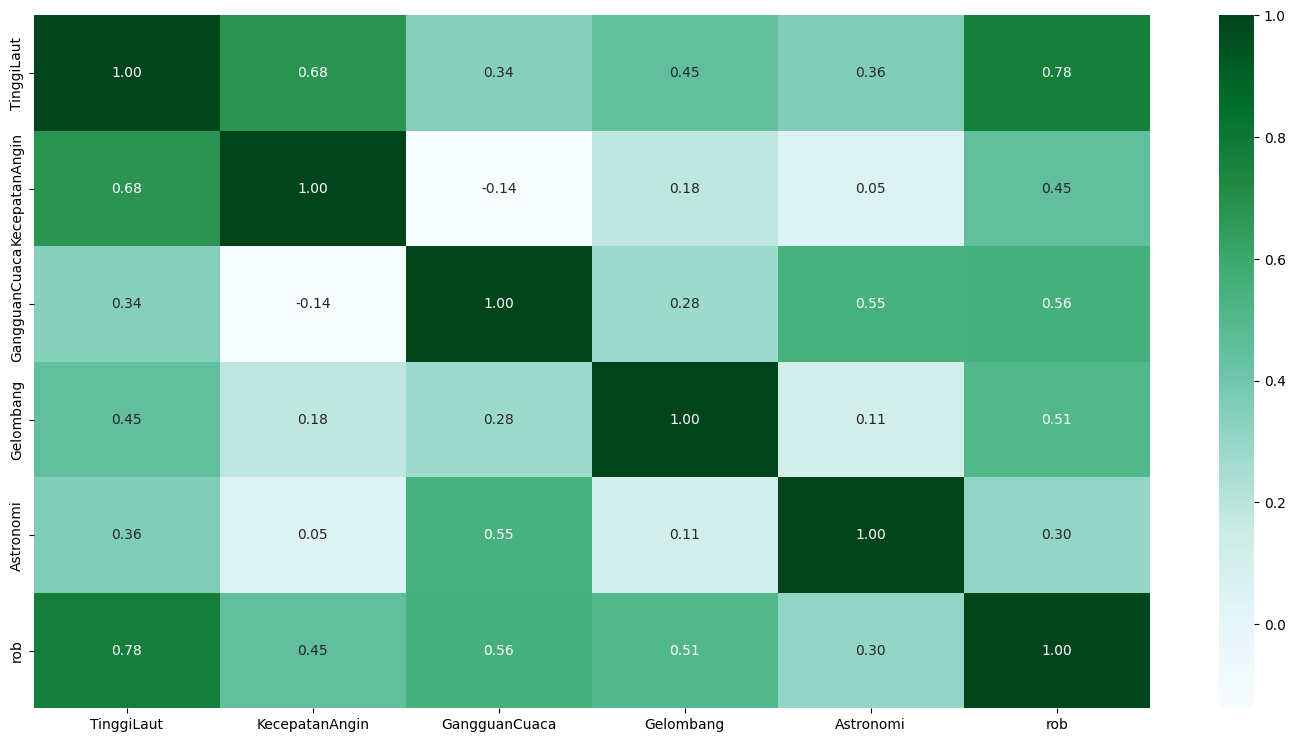

In [ ]:
fig, ax = plt.subplots(figsize=(18,9))
sns.heatmap(databanjir.corr(),annot=True, fmt=".2f",cmap='BuGn')
plt.show()

In [ ]:
X = databanjir.drop (columns='rob', axis=1)
Y = databanjir['rob']

In [ ]:
print(X)

    TinggiLaut  KecepatanAngin  GangguanCuaca  Gelombang  Astronomi
0     1.000000               0              1   1.250000          0
1     1.100000               0              1   1.250000          0
2     1.200000               0              1   1.000000          1
3     1.300000              15              1   1.000000          1
4     1.400000              10              1   0.750000          1
5     1.400000              15              1   0.750000          1
6     1.500000              15              1   0.750000          1
7     1.500000              25              1   1.500000          1
8     1.500000              15              1   2.000000          1
9     1.500000              15              1   2.000000          1
10    1.400000               8              1   2.000000          1
11    1.400000               8              0   1.500000          0
12    1.200000              10              0   1.500000          0
13    1.200000              15              0   

In [ ]:
print(Y)

0     0
1     0
2     0
3     0
4     0
5     0
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    1
19    1
20    1
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
Name: rob, dtype: int64


## **STANDARISASI DATA**

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standarized_data = scaler.transform(X)

In [ ]:
print(standarized_data)

[[-2.77489077 -2.22541686  0.55901699 -0.16032029 -1.41421356]
 [-2.13894527 -2.22541686  0.55901699 -0.16032029 -1.41421356]
 [-1.50299976 -2.22541686  0.55901699 -0.82904427  0.70710678]
 [-0.86705426 -0.08166667  0.55901699 -0.82904427  0.70710678]
 [-0.23110875 -0.79625007  0.55901699 -1.49776825  0.70710678]
 [-0.23110875 -0.08166667  0.55901699 -1.49776825  0.70710678]
 [ 0.40483675 -0.08166667  0.55901699 -1.49776825  0.70710678]
 [ 0.40483675  1.34750012  0.55901699  0.50840369  0.70710678]
 [ 0.40483675 -0.08166667  0.55901699  1.84585165  0.70710678]
 [ 0.40483675 -0.08166667  0.55901699  1.84585165  0.70710678]
 [-0.23110875 -1.08208343  0.55901699  1.84585165  0.70710678]
 [-0.23110875 -1.08208343 -1.78885438  0.50840369 -1.41421356]
 [-1.50299976 -0.79625007 -1.78885438  0.50840369 -1.41421356]
 [-1.50299976 -0.08166667 -1.78885438 -1.49776825 -1.41421356]
 [-0.86705426  1.34750012 -1.78885438 -0.16032029 -1.41421356]
 [-0.23110875  1.34750012 -1.78885438 -0.16032029  0.70

In [ ]:
X = standarized_data
Y = databanjir['rob']

In [ ]:
print(X)
print(Y)

[[-2.77489077 -2.22541686  0.55901699 -0.16032029 -1.41421356]
 [-2.13894527 -2.22541686  0.55901699 -0.16032029 -1.41421356]
 [-1.50299976 -2.22541686  0.55901699 -0.82904427  0.70710678]
 [-0.86705426 -0.08166667  0.55901699 -0.82904427  0.70710678]
 [-0.23110875 -0.79625007  0.55901699 -1.49776825  0.70710678]
 [-0.23110875 -0.08166667  0.55901699 -1.49776825  0.70710678]
 [ 0.40483675 -0.08166667  0.55901699 -1.49776825  0.70710678]
 [ 0.40483675  1.34750012  0.55901699  0.50840369  0.70710678]
 [ 0.40483675 -0.08166667  0.55901699  1.84585165  0.70710678]
 [ 0.40483675 -0.08166667  0.55901699  1.84585165  0.70710678]
 [-0.23110875 -1.08208343  0.55901699  1.84585165  0.70710678]
 [-0.23110875 -1.08208343 -1.78885438  0.50840369 -1.41421356]
 [-1.50299976 -0.79625007 -1.78885438  0.50840369 -1.41421356]
 [-1.50299976 -0.08166667 -1.78885438 -1.49776825 -1.41421356]
 [-0.86705426  1.34750012 -1.78885438 -0.16032029 -1.41421356]
 [-0.23110875  1.34750012 -1.78885438 -0.16032029  0.70

## **MEMISAHKAN DATA TRAINING DAN DATA TESTING**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(42, 5) (33, 5) (9, 5)


## **MENGOLAH DATA DENGAN ALGORITMA SVM**

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

## **MEMBUAT MODEL UNTUK MENGUKUR AKURASI**

In [ ]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Akurasi data training adalah = ', training_data_accuracy)

Akurasi data training adalah =  1.0


In [ ]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Akurasi data test adalah = ', test_data_accuracy)

Akurasi data test adalah =  0.8888888888888888


# **MEMBUAT MODEL PREDIKSI**

In [ ]:
input_data = (1.5, 15, 1, 0.75, 1)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

std_data = scaler.transform(input_data_reshape)
print(std_data)

prediction = classifier.predict(std_data)
print(std_data)

if prediction[0] == 0:
    result = 'Tidak berpotensi naiknya air laut dan banjir'
else:
    result = 'Berpotensi naiknya air laut menyebabkan banjir'

print(result)


[[ 0.40483675 -0.08166667  0.55901699 -1.49776825  0.70710678]]
[[ 0.40483675 -0.08166667  0.55901699 -1.49776825  0.70710678]]
Berpotensi naiknya air laut menyebabkan banjir


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## **SIMPAN MODEL**

In [ ]:
import pickle

In [ ]:
filename = 'coba.csv'
pickle.dump(classifier, open(filename,'wb'))